<a href="https://colab.research.google.com/github/roobyyi/Data-Scientist-Practicum-Project/blob/main/Project%204.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Megaline Telecomunication

Pendahuluan

Sebagai analis pada telekomunikasi Megaline, pekerja diharapkan untuk menganalisa terkati paket yang bisa ditawarkan yaitu,

**1. Surf**\
Biaya bulanan: 20 dolar\
500 menit durasi panggilan per bulan, 50 SMS, dan 15 GB data\
Setelah melebihi batas paket, akan dikenakan:\
1 menit: 3 sen\
1 SMS: 3 sen\
1 GB data: 10 dolar

**2. Ultimate**\
Biaya bulanan: 70 dolar\
3000 menit durasi panggilan per bulan, 1000 SMS, dan 30 GB data\
Setelah melebihi batas paket, akan dikenakan:\
1 menit: 1 sen\
1 SMS: 1 sen\
1 GB data: 7 dolar

Dengan menganalisa kebiasaan pelanggan dari kedua paket tersebut, diharapkan analis bisa mencari kesimpulan tentang paket mana yang lebih baik ditingkatkan pengiklanannya untuk pendapatan yang lebih banyak.

<h1>Daftar Isi<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Menyiapkan-data" data-toc-modified-id="Menyiapkan-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Menyiapkan data</a></span><ul class="toc-item"><li><span><a href="#Import-Library-dan-Import-Data" data-toc-modified-id="Import-Library-dan-Import-Data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Import Library dan Import Data</a></span></li><li><span><a href="#Persiapan-data" data-toc-modified-id="Persiapan-data-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Persiapan data</a></span><ul class="toc-item"><li><span><a href="#Calls" data-toc-modified-id="Calls-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Calls</a></span></li><li><span><a href="#Internet" data-toc-modified-id="Internet-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Internet</a></span></li><li><span><a href="#Messages" data-toc-modified-id="Messages-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>Messages</a></span></li><li><span><a href="#Plans" data-toc-modified-id="Plans-1.2.4"><span class="toc-item-num">1.2.4&nbsp;&nbsp;</span>Plans</a></span></li><li><span><a href="#Users" data-toc-modified-id="Users-1.2.5"><span class="toc-item-num">1.2.5&nbsp;&nbsp;</span>Users</a></span></li></ul></li></ul></li><li><span><a href="#Analisa-Data" data-toc-modified-id="Analisa-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Analisa Data</a></span><ul class="toc-item"><li><span><a href="#Penggabungan-Data" data-toc-modified-id="Penggabungan-Data-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Penggabungan Data</a></span></li><li><span><a href="#Analisa-Data" data-toc-modified-id="Analisa-Data-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Analisa Data</a></span></li></ul></li><li><span><a href="#Uji-Hipotesis" data-toc-modified-id="Uji-Hipotesis-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Uji Hipotesis</a></span><ul class="toc-item"><li><span><a href="#Hipotesis-Paket" data-toc-modified-id="Hipotesis-Paket-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Hipotesis Paket</a></span></li><li><span><a href="#Hipotesis-Region" data-toc-modified-id="Hipotesis-Region-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Hipotesis Region</a></span></li></ul></li><li><span><a href="#Kesimpulan" data-toc-modified-id="Kesimpulan-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Kesimpulan</a></span></li></ul></div>

## Menyiapkan data

### Import Library dan Import Data

In [3]:
import pandas as pd
from scipy import stats as st
import seaborn as sb
import numpy as np

In [4]:
calls = pd.read_csv('/content/megaline_calls.csv')
internet = pd.read_csv('/content/megaline_internet.csv')
messages = pd.read_csv('/content/megaline_messages.csv')
plans = pd.read_csv('/content/megaline_plans.csv')
users = pd.read_csv('/content/megaline_users.csv')

### Persiapan data

Langkah pertama adalah mempersiapkan data dan menelaah dulu tentang datanya

#### Calls

In [5]:
calls.info()
calls.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


0

In [6]:
calls.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


In [7]:
calls.query('duration==0').count()

id           26834
user_id      26834
call_date    26834
duration     26834
dtype: int64

Data aman tidak ada duplikat dan nilai NaN, tipe data masih harus diperbaiki dan ada beberapa panggilan yang durasinya adalah 0. Untuk panggilan misscalls, lebih baik data ini tetap ada karena siapa tau ada user yang dalam 1 bulan hanya misscalls saja tanpa menelfon.

In [8]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')

Tipe data call_date sudah menjadi datetime.

In [9]:
calls.describe()

,user_id,duration
count,137735.000000,137735.000000
mean,1247.658046,6.745927
std,139.416268,5.839241
min,1000.000000,0.000000
25%,1128.000000,1.290000
50%,1247.000000,5.980000
75%,1365.000000,10.690000
max,1499.000000,37.600000


Tidak terlihat adanya kejanggalan data.

In [10]:
calls['month'] = calls['call_date'].dt.strftime('%Y%m')

In [11]:
calls['month']

0         201812
1         201812
2         201812
3         201812
4         201812
           ...  
137730    201811
137731    201810
137732    201809
137733    201810
137734    201812
Name: month, Length: 137735, dtype: object

In [12]:
calls['duration'] = calls['duration'].apply(np.ceil)

In [13]:
calls['year'] = calls['call_date'].dt.year

In [14]:
calls['year'].value_counts()

2018    137735
Name: year, dtype: int64

Untung saja hanya data 1 tahun hehe

In [15]:
call_bulan = calls.pivot_table(index='user_id',columns='month',values='duration',aggfunc='sum')
call_bulan

month,201801,201802,201803,201804,201805,201806,201807,201808,201809,201810,201811,201812
user_id,,,,,,,,,,,,
1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,124.0
1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,182.0,315.0,393.0,426.0,412.0
1002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,386.0,384.0
1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1104.0
1004,NaN,NaN,NaN,NaN,193.0,275.0,381.0,354.0,301.0,365.0,476.0,427.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,302.0,610.0,361.0,492.0
1496,NaN,NaN,NaN,NaN,NaN,NaN,NaN,122.0,414.0,317.0,308.0,294.0
1497,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,300.0


In [16]:
panggilan_bulan = calls.pivot_table(index=['user_id','month'],values='duration',aggfunc='sum')
panggilan_bulan

duration
user_id month           
1000    201812     124.0
1001    201808     182.0
        201809     315.0
        201810     393.0
        201811     426.0
...                  ...
1498    201812     339.0
1499    201809     346.0
        201810     385.0
        201811     308.0
        201812     496.0

[2258 rows x 1 columns]

#### Internet

In [17]:
internet.info()
internet.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


0

In [18]:
internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


Sama seperti bagian calls, ada nilai 0 dan tipe data yang harus diubah, namun untuk yang ini, nilai 0 akan tetap dibawa karena untuk melihat jika ada user yang dalam 1 bulan tidak memakai internet sama sekali.

In [19]:
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')

Tipe data sudah diganti menjadi datetime.

In [20]:
internet.describe()

,user_id,mb_used
count,104825.000000,104825.000000
mean,1242.496361,366.713701
std,142.053913,277.170542
min,1000.000000,0.000000
25%,1122.000000,136.080000
50%,1236.000000,343.980000
75%,1367.000000,554.610000
max,1499.000000,1693.470000


In [21]:
internet['month'] = internet['session_date'].dt.strftime('%Y%m')

In [22]:
internet_bulan = internet.pivot_table(index=['user_id','month'],values='mb_used',aggfunc='sum')
internet_bulan

mb_used
user_id month           
1000    201812   1901.47
1001    201808   6919.15
        201809  13314.82
        201810  22330.49
        201811  18504.30
...                  ...
1498    201812  23137.69
1499    201809  12984.76
        201810  19492.43
        201811  16813.83
        201812  22059.21

[2277 rows x 1 columns]

In [23]:
mb_bulan = internet.pivot_table(index='user_id',columns='month',values='mb_used',aggfunc='sum')
mb_bulan

month,201801,201802,201803,201804,201805,201806,201807,201808,201809,201810,201811,201812
user_id,,,,,,,,,,,,
1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1901.47
1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6919.15,13314.82,22330.49,18504.30,19369.18
1002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6552.01,19345.08,14396.24
1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27044.14
1004,NaN,NaN,NaN,NaN,6547.21,20672.82,24516.62,27981.74,18852.72,14541.63,21850.78,21389.29
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22981.37,26899.41,24912.78,24097.40
1496,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8605.66,16389.27,14287.36,8547.36,16438.99
1497,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11106.55


Tidak terlihat adanya kejanggalan data.

In [24]:
internet.pivot_table(index='user_id',values='mb_used')

,mb_used
user_id,
1000,380.294000
1001,328.318122
1002,324.946210
1003,520.079615
1004,339.897413
...,...
1495,341.003310
1496,285.638400
1497,358.275806


#### Messages

In [25]:
messages.info()
messages.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


0

In [26]:
 messages.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


In [27]:
messages.pivot_table(index='user_id',values='id',aggfunc='count')

,id
user_id,
1000,11
1001,207
1002,88
1003,50
1004,177
...,...
1491,409
1492,108
1494,174


Untuk messages hanya tipe data yang perlu diperbaiki

In [28]:
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')

In [29]:
messages.describe()

,user_id
count,76051.000000
mean,1245.972768
std,139.843635
min,1000.000000
25%,1123.000000
50%,1251.000000
75%,1362.000000
max,1497.000000


Tidak terlihat adanya kejanggalan data.

In [30]:
messages['month'] = messages['message_date'].dt.strftime('%Y%m')

In [31]:
pesan_bulan = messages.pivot_table(index='user_id',columns='month',values='id',aggfunc='count')
pesan_bulan

month,201801,201802,201803,201804,201805,201806,201807,201808,201809,201810,201811,201812
user_id,,,,,,,,,,,,
1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0
1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.0,44.0,53.0,36.0,44.0
1002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0,32.0,41.0
1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0
1004,NaN,NaN,NaN,NaN,7.0,18.0,26.0,25.0,21.0,24.0,25.0,31.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1491,NaN,NaN,NaN,6.0,45.0,54.0,64.0,50.0,50.0,51.0,46.0,43.0
1492,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,29.0,31.0,37.0
1494,NaN,NaN,NaN,NaN,NaN,NaN,20.0,27.0,21.0,38.0,35.0,33.0


In [32]:
jumlah_pesan = messages.pivot_table(index=['user_id','month'],values='id',aggfunc='count')
jumlah_pesan

id
user_id month     
1000    201812  11
1001    201808  30
        201809  44
        201810  53
        201811  36
...             ..
1496    201809  21
        201810  18
        201811  13
        201812  11
1497    201812  50

[1806 rows x 1 columns]

#### Plans

In [33]:
plans.info()
plans.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


0

In [34]:
plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


Ini adalah jenis paket yang ditawarkan dari Megalines.

#### Users

In [35]:
users.info()
users.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


0

In [36]:
users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


Hanya ada 34 user yang berhenti berlangganan. Data dari ke 34 ini tetap akan digunakan karena bisa melihat kenapa mereka berhenti berlangganan.

In [37]:
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')

Tipe reg_date sudah diganti menjadi datetime.

In [38]:
users.describe()

,user_id,age
count,500.000000,500.000000
mean,1249.500000,45.486000
std,144.481833,16.972269
min,1000.000000,18.000000
25%,1124.750000,30.000000
50%,1249.500000,46.000000
75%,1374.250000,61.000000
max,1499.000000,75.000000


In [39]:
users.pivot_table(index='city',values='user_id',aggfunc='count').sort_values(by='user_id',ascending=False)

,user_id
city,
"New York-Newark-Jersey City, NY-NJ-PA MSA",80
"Los Angeles-Long Beach-Anaheim, CA MSA",29
"Dallas-Fort Worth-Arlington, TX MSA",21
"Chicago-Naperville-Elgin, IL-IN-WI MSA",19
"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",17
...,...
"Stockton, CA MSA",1
"Greensboro-High Point, NC MSA",1
"El Paso, TX MSA",1


In [40]:
ambil = users
ambil

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,NaN
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaN
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaN
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaN


Tidak terlihat adanya kejanggalan data

In [41]:
ambil['churn_date'] = pd.to_datetime(ambil['churn_date'].fillna('2019-01-01'), format='%Y-%m-%d')

In [42]:
ambil

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,2019-01-01
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2019-01-01
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,2019-01-01
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,2019-01-01
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,2019-01-01
...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,2019-01-01
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,2019-01-01
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,2019-01-01
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,2019-01-01


In [43]:
ambil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  500 non-null    datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


**Dari semuanya memang tidak ada kejanggalan data, namun harus tetap waspada karena bisa saja ada yang terlewat.**

## Analisa Data

Selanjutnya adalah menganalisa data yang telah dipersiapkan.

### Penggabungan Data

Supaya data lebih mudah untuk dianalisa, dilakukan penggabungan data dengan patokan user_id nya.

In [44]:
gabung = pd.merge(panggilan_bulan.reset_index(), internet_bulan.reset_index(), how='outer')
gabung = pd.merge(gabung, jumlah_pesan.reset_index(), how='outer')
gabung.rename({'duration':'durasi_panggilan','mb_used':'mb_terpakai','id':'jumlah_pesan'},axis=1,inplace=True)
gabung

,user_id,month,durasi_panggilan,mb_terpakai,jumlah_pesan
0,1000,201812,124.0,1901.47,11.0
1,1001,201808,182.0,6919.15,30.0
2,1001,201809,315.0,13314.82,44.0
3,1001,201810,393.0,22330.49,53.0
4,1001,201811,426.0,18504.30,36.0
...,...,...,...,...,...
2288,1349,201810,NaN,13093.55,76.0
2289,1349,201811,NaN,17128.26,72.0
2290,1349,201812,NaN,13039.91,61.0
2291,1361,201805,NaN,1519.69,2.0


In [45]:
gabung = gabung.fillna(0)

In [46]:
gabung = gabung.merge(ambil, on='user_id',how='outer')
gabung

,user_id,month,durasi_panggilan,mb_terpakai,jumlah_pesan,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,201812,124.0,1901.47,11.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,2019-01-01
1,1001,201808,182.0,6919.15,30.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2019-01-01
2,1001,201809,315.0,13314.82,44.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2019-01-01
3,1001,201810,393.0,22330.49,53.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2019-01-01
4,1001,201811,426.0,18504.30,36.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2019-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...
2298,1307,NaN,NaN,NaN,NaN,Kristopher,Lang,28,"Boston-Cambridge-Newton, MA-NH MSA",2018-12-31,surf,2019-01-01
2299,1319,NaN,NaN,NaN,NaN,Eliseo,Carson,21,"Colorado Springs, CO MSA",2018-06-17,surf,2019-01-01
2300,1378,NaN,NaN,NaN,NaN,Mckinley,Clayton,22,"Denver-Aurora-Lakewood, CO MSA",2018-12-17,surf,2019-01-01
2301,1463,NaN,NaN,NaN,NaN,Dinorah,Simmons,30,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-11-27,ultimate,2019-01-01


In [47]:
gubang= ambil.merge(gabung, on="user_id",how='outer')
gubang.pivot_table(index='user_id',values=['durasi_panggilan'])

,durasi_panggilan
user_id,
1000,124.000000
1001,345.600000
1002,276.333333
1003,1104.000000
1004,346.500000
...,...
1495,441.250000
1496,291.000000
1497,300.000000


In [48]:
gabung.pivot_table(index='user_id',values=['age'])

,age
user_id,
1000,45
1001,28
1002,36
1003,52
1004,40
...,...
1495,67
1496,49
1497,49


Sebelum menganalisa lebih jauh, karena aturannya durasi yang terpakai dan internet yang terpakai akan dibulatkan keatas, maka diubah menjadi seperti itu, dan nilai nan pada durasi panggilan, mb terpakai, dan jumlah pesan akan dijadikan 0.

In [49]:
gabung['gb_terpakai'] = gabung['mb_terpakai']/1024

In [50]:
gabung['gb_terpakai'] = gabung['gb_terpakai'].apply(np.ceil)

In [51]:
gabung.loc[gabung['mb_terpakai'].isna()]

,user_id,month,durasi_panggilan,mb_terpakai,jumlah_pesan,first_name,last_name,age,city,reg_date,plan,churn_date,gb_terpakai
2293,1025,NaN,NaN,NaN,NaN,Jess,Wilkinson,64,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-10-28,ultimate,2019-01-01,NaN
2294,1129,NaN,NaN,NaN,NaN,Marin,Bolton,70,"Baton Rouge, LA MSA",2018-11-10,surf,2018-12-27,NaN
2295,1143,NaN,NaN,NaN,NaN,Lorina,Stevens,69,"Cincinnati, OH-KY-IN MSA",2018-10-26,surf,2019-01-01,NaN
2296,1269,NaN,NaN,NaN,NaN,Irving,Thompson,39,"Dallas-Fort Worth-Arlington, TX MSA",2018-09-13,ultimate,2018-12-15,NaN
2297,1275,NaN,NaN,NaN,NaN,Elvie,Velazquez,33,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-11-29,ultimate,2019-01-01,NaN
2298,1307,NaN,NaN,NaN,NaN,Kristopher,Lang,28,"Boston-Cambridge-Newton, MA-NH MSA",2018-12-31,surf,2019-01-01,NaN
2299,1319,NaN,NaN,NaN,NaN,Eliseo,Carson,21,"Colorado Springs, CO MSA",2018-06-17,surf,2019-01-01,NaN
2300,1378,NaN,NaN,NaN,NaN,Mckinley,Clayton,22,"Denver-Aurora-Lakewood, CO MSA",2018-12-17,surf,2019-01-01,NaN
2301,1463,NaN,NaN,NaN,NaN,Dinorah,Simmons,30,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-11-27,ultimate,2019-01-01,NaN
2302,1473,NaN,NaN,NaN,NaN,Kirk,Velez,61,"Louisville/Jefferson County, KY-IN MSA",2018-12-31,surf,2019-01-01,NaN


In [52]:
gabung

,user_id,month,durasi_panggilan,mb_terpakai,jumlah_pesan,first_name,last_name,age,city,reg_date,plan,churn_date,gb_terpakai
0,1000,201812,124.0,1901.47,11.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,2019-01-01,2.0
1,1001,201808,182.0,6919.15,30.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2019-01-01,7.0
2,1001,201809,315.0,13314.82,44.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2019-01-01,14.0
3,1001,201810,393.0,22330.49,53.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2019-01-01,22.0
4,1001,201811,426.0,18504.30,36.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2019-01-01,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2298,1307,NaN,NaN,NaN,NaN,Kristopher,Lang,28,"Boston-Cambridge-Newton, MA-NH MSA",2018-12-31,surf,2019-01-01,NaN
2299,1319,NaN,NaN,NaN,NaN,Eliseo,Carson,21,"Colorado Springs, CO MSA",2018-06-17,surf,2019-01-01,NaN
2300,1378,NaN,NaN,NaN,NaN,Mckinley,Clayton,22,"Denver-Aurora-Lakewood, CO MSA",2018-12-17,surf,2019-01-01,NaN
2301,1463,NaN,NaN,NaN,NaN,Dinorah,Simmons,30,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-11-27,ultimate,2019-01-01,NaN


In [53]:
plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


### Analisa Data

Setelah digabungkan, ada beberapa hal tambahan yang harus ditambahkan seperti pendapatan  yang diterima dari tiap paket (dari bayaran perbulan ataupun dari kuota tambahan jika melewati kuota yang ditentukan)

In [54]:
gabung = gabung.merge(plans,left_on='plan',right_on='plan_name')

In [55]:
#dibagi 1024 agar mempermudah
gabung['gb_per_month_included'] = gabung['mb_per_month_included']/1024

In [56]:
gabung.head(1)

,user_id,month,durasi_panggilan,mb_terpakai,jumlah_pesan,first_name,last_name,age,city,reg_date,...,gb_terpakai,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,1000,201812,124.0,1901.47,11.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,...,2.0,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0


In [57]:
def biaya(terpakai,kuota,harga,biaya):
    gabung[biaya] = (gabung[terpakai] - gabung[kuota])*gabung[harga]
    gabung.loc[gabung[biaya]<0,biaya]=0

In [58]:
gabung.head(1)

,user_id,month,durasi_panggilan,mb_terpakai,jumlah_pesan,first_name,last_name,age,city,reg_date,...,gb_terpakai,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,1000,201812,124.0,1901.47,11.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,...,2.0,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0


In [59]:
#panggilan
biaya('durasi_panggilan','minutes_included','usd_per_minute','biaya_panggilan_tambahan')
#pesan
biaya('jumlah_pesan','messages_included','usd_per_message','biaya_pesan_tambahan')
#internet
biaya('gb_terpakai','gb_per_month_included','usd_per_gb','biaya_internet_tambahan')

In [60]:
#biaya total perbulan
gabung['biaya_total'] = gabung['usd_monthly_pay'] + gabung['biaya_pesan_tambahan'] + gabung['biaya_internet_tambahan'] + gabung['biaya_panggilan_tambahan']

In [61]:
pd.set_option('display.max_columns', 100)

In [62]:
gabung.head()

,user_id,month,durasi_panggilan,mb_terpakai,jumlah_pesan,first_name,last_name,age,city,reg_date,plan,churn_date,gb_terpakai,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included,biaya_panggilan_tambahan,biaya_pesan_tambahan,biaya_internet_tambahan,biaya_total
0,1000,201812,124.0,1901.47,11.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,2019-01-01,2.0,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0,0.0,0.0,0.0,70.0
1,1006,201811,10.0,2068.37,15.0,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18,3.0,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0,0.0,0.0,0.0,70.0
2,1006,201812,59.0,32118.82,139.0,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18,32.0,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0,0.0,0.0,14.0,84.0
3,1008,201810,476.0,17106.99,21.0,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,2019-01-01,17.0,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0,0.0,0.0,0.0,70.0
4,1008,201811,446.0,23676.72,37.0,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,2019-01-01,24.0,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0,0.0,0.0,0.0,70.0


In [63]:
final_pay_detail = gabung[['user_id','month','city','plan','biaya_panggilan_tambahan','biaya_pesan_tambahan','biaya_internet_tambahan','biaya_total','churn_date']]

In [64]:
final_pay_detail.head()

,user_id,month,city,plan,biaya_panggilan_tambahan,biaya_pesan_tambahan,biaya_internet_tambahan,biaya_total,churn_date
0,1000,201812,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,0.0,0.0,0.0,70.0,2019-01-01
1,1006,201811,"San Francisco-Oakland-Berkeley, CA MSA",ultimate,0.0,0.0,0.0,70.0,2018-12-18
2,1006,201812,"San Francisco-Oakland-Berkeley, CA MSA",ultimate,0.0,0.0,14.0,84.0,2018-12-18
3,1008,201810,"Orlando-Kissimmee-Sanford, FL MSA",ultimate,0.0,0.0,0.0,70.0,2019-01-01
4,1008,201811,"Orlando-Kissimmee-Sanford, FL MSA",ultimate,0.0,0.0,0.0,70.0,2019-01-01


<AxesSubplot:xlabel='biaya_total', ylabel='plan'>

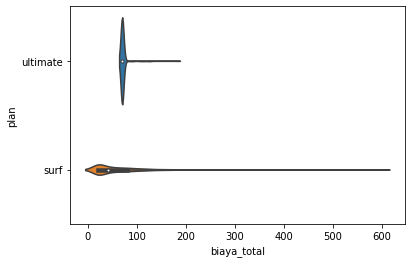

In [65]:
sb.violinplot(data=final_pay_detail,x='biaya_total',y='plan')

Dapat dilihat bahwa pengguna paket surf banyak yang biaya totalnya sangat besar. Kita lihat berapa banyak pengguna paket surf yang biayanya lebih dari biaya bulanan paket ultimate.

<AxesSubplot:xlabel='biaya_panggilan_tambahan', ylabel='user_id'>

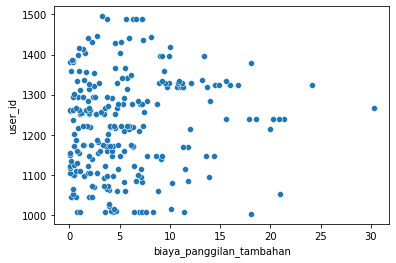

In [66]:
panggilan_tambahan = final_pay_detail.query('biaya_total>70&plan=="surf"&biaya_panggilan_tambahan>0')
sb.scatterplot(data=panggilan_tambahan,x='biaya_panggilan_tambahan',y='user_id')

In [67]:
panggilan_tambahan.pivot_table(index='user_id',values='biaya_panggilan_tambahan',aggfunc='count').sort_values(by='biaya_panggilan_tambahan',ascending=False)

,biaya_panggilan_tambahan
user_id,
1147,8
1328,8
1277,7
1009,7
1223,6
...,...
1173,1
1151,1
1136,1


In [68]:
call1 = panggilan_tambahan.pivot_table(index='user_id',values='biaya_panggilan_tambahan',aggfunc='max').sort_values(by='biaya_panggilan_tambahan',ascending=False)
call1

,biaya_panggilan_tambahan
user_id,
1267,30.30
1324,24.12
1240,21.36
1052,21.00
1215,20.01
...,...
1136,0.21
1260,0.12
1117,0.09


Untuk biaya tambahan panggilan masih bisa dikatakan wajar, karena ya mungkin user 1267 sedang ada keperluan penting.

Ada 111 user yang membayar lebih untuk panggilan, dengan 8x terbanyak yaitu user 1328 dan 1147.

In [ ]:
pesan_tambahan = final_pay_detail.query('biaya_total>70&plan=="surf"&biaya_pesan_tambahan>0')
sb.scatterplot(data=pesan_tambahan,x='biaya_pesan_tambahan',y='user_id')

<AxesSubplot:xlabel='biaya_pesan_tambahan', ylabel='user_id'>

In [ ]:
pesan_tambahan.pivot_table(index='user_id',values='biaya_pesan_tambahan',aggfunc='count').sort_values(by='biaya_pesan_tambahan',ascending=False)

User 1328 lagi

In [ ]:
len(pesan_tambahan.pivot_table(index='user_id',values='biaya_pesan_tambahan',aggfunc='count').sort_values(by='biaya_pesan_tambahan',ascending=False))

Ada 61 orang pemegang paket surf yang harus membayar lebih untuk pesan.

In [72]:
message1 = pesan_tambahan.pivot_table(index='user_id',values='biaya_pesan_tambahan',aggfunc='max').sort_values(by='biaya_pesan_tambahan',ascending=False)
message1

,biaya_pesan_tambahan
user_id,
1052,6.48
1381,5.22
1328,3.54
1076,3.27
1419,2.82
...,...
1125,0.12
1120,0.09
1001,0.09


<AxesSubplot:xlabel='biaya_internet_tambahan', ylabel='user_id'>

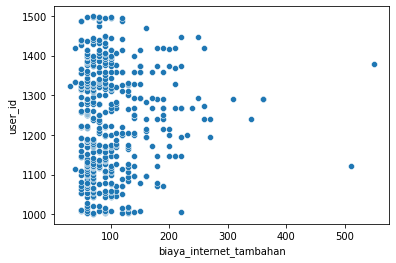

In [73]:
internet_tambahan = final_pay_detail.query('biaya_total>70&plan=="surf"&biaya_internet_tambahan>0')
sb.scatterplot(data=internet_tambahan,x='biaya_internet_tambahan',y='user_id')

In [74]:
internet_tambahan.pivot_table(index='user_id',values='biaya_internet_tambahan',aggfunc='count').sort_values(by='biaya_internet_tambahan',ascending=False)

,biaya_internet_tambahan
user_id,
1359,10
1268,9
1251,8
1147,8
1374,8
...,...
1219,1
1198,1
1183,1


Ada 187 user yang membayar lebih untuk internet

In [75]:
internet1 = internet_tambahan.pivot_table(index='user_id',values='biaya_internet_tambahan',aggfunc='mean').sort_values(by='biaya_internet_tambahan',ascending=False)
internet1

,biaya_internet_tambahan
user_id,
1379,550.000000
1121,510.000000
1272,260.000000
1292,243.333333
1447,235.000000
...,...
1193,50.000000
1355,50.000000
1366,50.000000


In [76]:
a = len(final_pay_detail.query('plan=="surf"').pivot_table(index='user_id',values='biaya_total'))
print(f'User yang menggunakan paket surf adalah sebanyak {a}')

User yang menggunakan paket surf adalah sebanyak 333


Selanjutnya adalah seberapa banyak yang menggunakan paket surf yang bayar lebih dari biaya bulanan paket ultimate.

In [77]:
final_pay_detail.query('plan=="surf"&biaya_total>70').pivot_table(index='user_id',values='biaya_total',aggfunc='max').sort_values(by='biaya_total',ascending=False)

,biaya_total
user_id,
1379,590.37
1121,531.41
1292,380.00
1240,377.85
1194,290.36
...,...
1146,71.08
1260,71.02
1109,70.69


User 1379 terlihat sangat sultan, dengan biaya total hampir 600 dolar 1 bulan, dengan biaya internetnya 550 dolar. Download apa saja ya? 🤨
Ada 187 user yang membayar lebih dan ini bisa saja cocok dengan user yang membayar lebih hanya untuk internet saja

<AxesSubplot:ylabel='Count'>

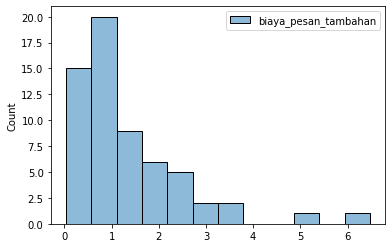

In [78]:
sb.histplot(message1)

<AxesSubplot:ylabel='Count'>

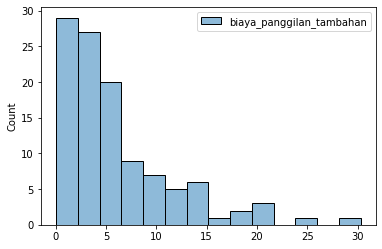

In [79]:
sb.histplot(call1)

<AxesSubplot:ylabel='Count'>

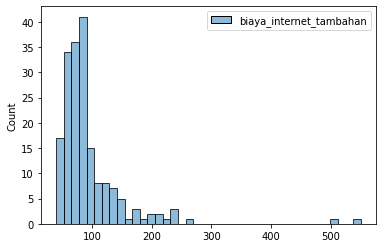

In [80]:
sb.histplot(internet1)

Dari ketiga biaya tambahan, yang paling banyak adalah biaya tambahan dari internet. Yang mana ada 1 orang yang sangat melonjak hingga lebih dari 500 dolar.

Hanya saja ada yang masih harus di cari, sebagai pengguna ultimate, di bagian mana yang membuat mereka membayar lebih?

In [81]:
final_pay_detail.query('plan=="ultimate" & biaya_total>70').describe()

,user_id,biaya_panggilan_tambahan,biaya_pesan_tambahan,biaya_internet_tambahan,biaya_total
count,41.000000,41.0,41.0,41.000000,41.000000
mean,1198.804878,0.0,0.0,40.634146,110.634146
std,176.966553,0.0,0.0,27.165931,27.165931
min,1006.000000,0.0,0.0,7.000000,77.000000
25%,1038.000000,0.0,0.0,21.000000,91.000000
50%,1144.000000,0.0,0.0,42.000000,112.000000
75%,1373.000000,0.0,0.0,56.000000,126.000000
max,1490.000000,0.0,0.0,112.000000,182.000000


Semua pengguna user hanya membayar biaya tambahan pada internet, untuk pesan dan panggilan sudah sangat cukup mengingat kuota nya sangat besar.

Selanjutnya adalah menganalisa kenapa pengguna Megaline ada yang berhenti?

In [82]:
churn = final_pay_detail.loc[~final_pay_detail['churn_date'].isna()]

In [83]:
churn.pivot_table(index=['user_id','plan'],values=['biaya_internet_tambahan','biaya_panggilan_tambahan','biaya_pesan_tambahan'],aggfunc='max')

,,biaya_internet_tambahan,biaya_panggilan_tambahan,biaya_pesan_tambahan
user_id,plan,,,
1000,ultimate,0.0,0.00,0.00
1001,surf,70.0,0.00,0.09
1002,surf,40.0,0.00,0.00
1003,surf,120.0,18.12,0.00
1004,surf,130.0,0.00,0.00
...,...,...,...,...
1495,surf,120.0,3.30,0.00
1496,surf,20.0,0.00,0.00
1497,ultimate,0.0,0.00,0.00


Ternyata terlalu random untuk menyimpulkan mengapa user berhenti, namun ada kemungkinan yaitu karena memang usernya sendiri berpindah rumah sehingga tidak berlangganan kembali. Jadi lebih baik juga untuk memberikan kuisioner ketika user berhenti berlangganan.

Selanjutnya adalah dengan kebiasaan pengguna. Untuk hal ini harus mengeliminasi outliernya karena beberapa pengguna bisa mengacak distribusinya.

<AxesSubplot:>

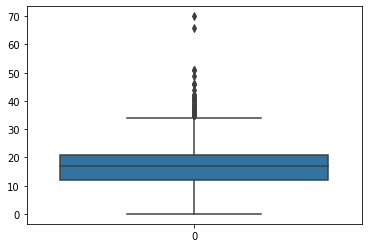

In [84]:
sb.boxplot(data = gabung['gb_terpakai'])

<AxesSubplot:>

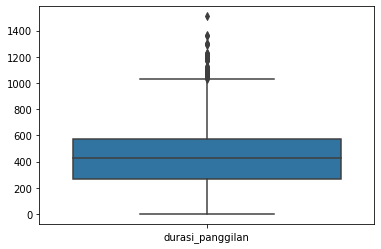

In [85]:
sb.boxplot(data=gabung[['durasi_panggilan']])

<AxesSubplot:>

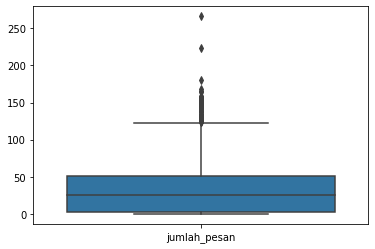

In [86]:
sb.boxplot(data=gabung[['jumlah_pesan']])

Ya dari ketiga data, ketiganya memiliki banyak outlier.\
Outlier ini dihapus karena ingin menganalisa bagaimana kebiasaan mayoritas pengguna. Karena pelanggan baru akan setidaknya mirip dengan mayoritas, karena minoritas data tidak terlalu penting.

In [87]:
def q75(data):
    return data.quantile(0.75)
def q25(data):
    return data.quantile(0.25)
def iqr(data):
    return q75(data) - q25(data)
def top_outlier(data,x):
    return (q75(data[x])+(1.5*iqr(data[x])))
def bot_outlier(data,x):
    return (q25(data[x])-(1.5*iqr(data[x])))

In [88]:
top_outlier(gabung,'jumlah_pesan')

123.0

In [89]:
#BATAS ATAS OUTLIER
max_msg = top_outlier(gabung,'jumlah_pesan')
max_call = top_outlier(gabung,'durasi_panggilan')
max_int = top_outlier(gabung,'gb_terpakai')

In [90]:
#BATAS BAWAH OUTLIER
min_msg = bot_outlier(gabung,'jumlah_pesan')
min_call = bot_outlier(gabung,'durasi_panggilan')
min_int = bot_outlier(gabung,'gb_terpakai')

In [91]:
# Simpan data tanpa outlier dalam DataFrame yang terpisah
data_msg = gabung.query('@min_msg<=jumlah_pesan<=@max_msg')
data_int = data_msg.query('@min_int<=gb_terpakai<=@max_int')
final_outlier = data_int.query('@min_call<=durasi_panggilan<=@max_call')


<AxesSubplot:xlabel='gb_terpakai', ylabel='Count'>

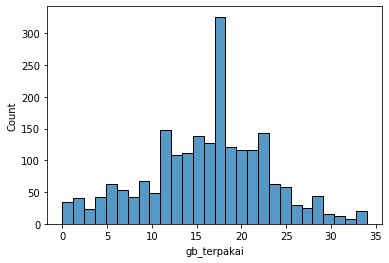

In [92]:
sb.histplot(data = final_outlier['gb_terpakai'])

In [93]:
gb_mean = final_outlier['gb_terpakai'].mean()
gb_var  = final_outlier['gb_terpakai'].var()
gb_std  = final_outlier['gb_terpakai'].std()

In [94]:
print(f'Rata rata penggunaan internet adalah {gb_mean}')
print(f'Varians penggunaan internet adalah {gb_var}')
print(f'Standar deviasi penggunaan internet adalah {gb_std}')


Rata rata penggunaan internet adalah 16.175046554934823
Varians penggunaan internet adalah 45.53897647663926
Standar deviasi penggunaan internet adalah 6.7482572918227754


Terlihat bahwa variansnya cukup tinggi sehingga terlihat bahwa penggunaan internet dari berbagai user bisa dibilang berbeda beda namun memang distribusinya hampir bisa terlihat normal.

<AxesSubplot:xlabel='durasi_panggilan', ylabel='Count'>

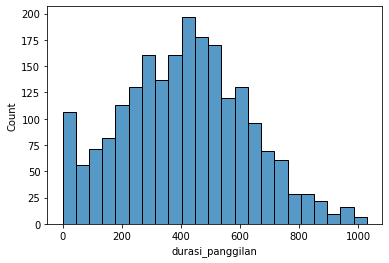

In [95]:
sb.histplot(data = final_outlier['durasi_panggilan'])

In [96]:
call_mean = final_outlier['durasi_panggilan'].mean()
call_var  = final_outlier['durasi_panggilan'].var()
call_std  = final_outlier['durasi_panggilan'].std()

In [97]:
print(f'Rata rata durasi panggilan adalah {call_mean}')
print(f'Varians durasi panggilan adalah {call_var}')
print(f'Standar deviasi durasi panggilan adalah {call_std}')


Rata rata durasi panggilan adalah 412.328677839851
Varians durasi panggilan adalah 45240.70049065909
Standar deviasi durasi panggilan adalah 212.69861421894382


Untuk durasi panggilan apalagi, variansi yang tinggi dikarenakan jumlah populasinya yang besar, namun untuk distribusi datanya sedikit normal

<AxesSubplot:xlabel='jumlah_pesan', ylabel='Count'>

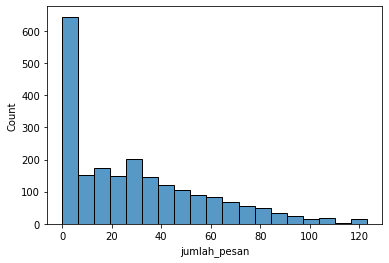

In [98]:
sb.histplot(data = final_outlier['jumlah_pesan'])

In [99]:
msg_mean = final_outlier['jumlah_pesan'].mean()
msg_var  = final_outlier['jumlah_pesan'].var()
msg_std  = final_outlier['jumlah_pesan'].std()

In [100]:
print(f'Rata rata jumlah pesan adalah {msg_mean}')
print(f'Varians jumlah pesan adalah {msg_var}')
print(f'Standar deviasi jumlah pesan adalah {msg_std}')


Rata rata jumlah pesan adalah 29.27467411545624
Varians jumlah pesan adalah 799.434532963149
Standar deviasi jumlah pesan adalah 28.274273341027687


Untuk jumlah pesan variansinya sangat tinggi namun distribusi datanya tidak terlihat normal. Ini yang bisa kita ubah, untuk memberikan tambahan paket yang mengurangi kuota pesan gratis untuk menurunkan harga dan menarik pelanggan baru.

Dari analisa data ini, yang dapat diambil adalah
* Pengguna surf kebanyakan membayar lebih untuk internet
* Ada beberapa pengguna yang membayar lebih untuk pesan dan panggilan
* Kuota yang diberikan paket ultimate pada panggilan dan pesan dirasa sangat berlebih
* Sebaiknya dibuat paket mid-range yang berkisar 30-50 dolar, dengan meningkatkan internet  dan meningkatkan kuota panggilan dan pesan. Hal ini berguna untuk menarik pelanggan yang merasakan bahwa paket ultimate memberikan terlalu banyak kuota panggilan dan pesan.
* Sebaiknya dibuat paket baru dengan pengurangan kuota pesan, karena ada banyak pengguna yang tidak menggunakan kuota pesan secara maksimal, hal ini dilakukan untuk menarik pelanggan baru yang memiliki masalah yang sama "Tidak mau mendaftar paket karena kuota pesannya terlalu banyak dan nantinya akan sia sia".
* Sebaiknya memberikan kuota add-on tambahan yang bisa dibeli, sehingga pelanggan yang masih kurang dengan kuotanya bisa membeli add-on (Ini diperuntukkan untuk para minoritas yang datanya dihapus karena merupakan outlier). Hal ini memang mengurangi peminat harga mid-range, maka dari itu bisa mengadakan kuota add-on yang bisa dibilang cukup merugikan pengguna agar perusahaan bisa tetap untung (Karena biasanya minoritas tersebut adalah sultan, maksudnya yang memakai kuota berlebihan sampai lupa ada biaya tambahan). Misalnya memberikan kuota yang melimpah dengan harga yang lumayan tinggi, namun dalam jangka waktu yang singkat (1 hari atau kuota hanya berlaku pada jam tertentu), atau sebaliknya kuota sedikit namun jangka waktunya yang panjang.
* Agar reputasi terlihat baik, bisa menawarkan upgrade plan, ketika biaya total yang harus dibayar pengguna surf mencapai biaya bulanan paket mid-range atau paket ultimate.

## Uji Hipotesis

Pengujian hipotesis dilakukan pada paket dan region (New Jersey, New York, dan kota kota lainnya). Pengujian dilakukan dengan menganggap varians dari kedua dataset adalah berbeda Karena dilihat dari biaya dan populasi paket surf dan ultimate sudah berbeda. Begitu pula dengan region, karena region diluar New Jersey ataupun New York lebih banyak, sehingga mengakibatkan variansinya berbeda dengan wilayah yang berhubungan dengan New York dan New Jersey. Batas ambang error yang dipilih adalah 5%.

### Hipotesis Paket

Hipotesis paket adalah hipotesis dimana pendapatan dari pengguna paket surf dan ultimate berbeda.
Kita ambil bahwa 
* H0 : Pendapatan dari pengguna paket surf dan ultimate berbeda
* H1 : Pendapatan dari pengguna paket surf dan ultimate sama

In [101]:
surf = final_pay_detail.query('plan=="surf"')['biaya_total'].dropna()
ultimate = final_pay_detail.query('plan=="ultimate"')['biaya_total'].dropna()

In [102]:
pv1 = st.ttest_ind(surf,ultimate,equal_var=False).pvalue
print(f'pvalue = {pv1}')
if pv1 < 0.05:
    print("H0 ditolak, Pendapatan dari pengguna paket surf dan ultimate sama")
else:
    print("H0 diterima, Pendapatan dari pengguna paket surf dan ultimate berbeda") 

pvalue = 3.1703905481135734e-15
H0 ditolak, Pendapatan dari pengguna paket surf dan ultimate sama


In [103]:
print(f'Pendapatan rata rata dari paket surf adalah {surf.mean()}')
print(f'Pendapatan rata rata dari paket ultimate adalah {ultimate.mean()}')

Pendapatan rata rata dari paket surf adalah 60.706408137317226
Pendapatan rata rata dari paket ultimate adalah 72.31388888888888


[Text(0.5, 0, 'Paket'), Text(0, 0.5, 'Pendapatan')]

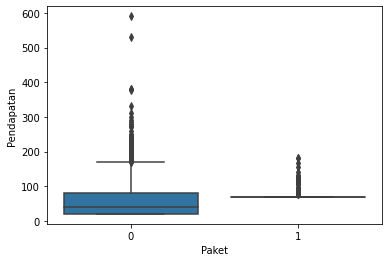

In [104]:
sb.boxplot(data=(surf,ultimate)).set(xlabel='Paket', ylabel='Pendapatan')

0 untuk paket surf, dan 1 untuk paket ultimate.

Memang untuk paket surf lebih bervariasi dan ada yang menghasilkan lebih besar dari paket ultimate, namun paket ultimate memiliki median yang lebih besar dibanding paket surf.

### Hipotesis Region

Hipotesis region adalah hipotesis dimana pendapatan dari pengguna di wilayah NY-NJ berbeda dengan pendapatan pengguna dari wilayah lain.
* H0 : Pendapatan dari pengguna di region New York dan New Jersey berbeda.
* H1 : Pendapatan dari pengguna di region New York dan New Jersey sama.

In [105]:
ny_nj = final_pay_detail[final_pay_detail['city'].str.contains("NY"or"NJ")]['biaya_total'].dropna()
other = final_pay_detail[~final_pay_detail['city'].str.contains("NY"or"NJ")]['biaya_total'].dropna()


In [106]:
pv2 = st.ttest_ind(ny_nj,other,equal_var=False).pvalue
print(f'pvalue = {pv2}')
if pv2 < 0.05:
    print("H0 ditolak, Pendapatan dari pengguna region New York dan New Jersey sama.")
else:
    print("H0 diterima, Pendapatan dari pengguna di region New York dan New Jersey berbeda.") 

pvalue = 0.0902061652931304
H0 diterima, Pendapatan dari pengguna di region New York dan New Jersey berbeda.


Waw diterima!

Pendapatan rata rata di New York dan New Jersey adalah 60.90492610837439
Pendapatan rata rata di luar wilayah New York dan New Jersey adalah 65.09262321144674


[Text(0.5, 0, 'Region'), Text(0, 0.5, 'Pendapatan')]

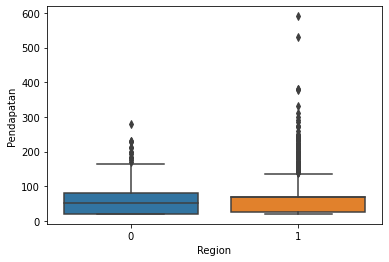

In [107]:
print(f'Pendapatan rata rata di New York dan New Jersey adalah {ny_nj.mean()}')
print(f'Pendapatan rata rata di luar wilayah New York dan New Jersey adalah {other.mean()}')
sb.boxplot(data = (ny_nj,other)).set(xlabel='Region', ylabel='Pendapatan')

0 untuk region New York - New Jersey, 1 untuk region lainnya.

Region lainnya memiliki median yang lebih besar dibanding region NY-NJ, untuk median pada boxplot overlapping dengan quartile 3 sehingga tidak terlihat dengan jelas, namun jika dizoom, nampak quartile 3 lebih hitam.

## Kesimpulan

Kesimpulan yang bisa diberikan adalah
1. Pendapatan dari paket ultimate dan surf berbeda, tapi memang pendapatan dari paket surf hampir mengejar paket ultimate.
2. Pendapatan di wilayah New York dan New Jersey, dengan daerah lain bisa dikatakan sama. Jadi tidak kebutuhan telekomunkasi tidak berpengaruh dengan letaknya.
3. Banyak sekali pengguna baik pengguna paket surf ataupun ultimate yang penggunaan internetnya sangat besar (melebihi batas kuota).
4. Begitu pula dengan pesan dan panggilan untuk paket surf, yang banyak penggunanya menggunakan lebih dari batas kuota.
5. Penggunaan kuota pesan dan panggilan untuk paket ultimate dirasa terlalu rendah dibandingkand engan kuota yang diberikan.

Rekomendasi yang bisa diberikan adalah
1. Pengadaan paket baru diharga mid-range sekitar 30-50 dolar untuk orang orang yang masih kurang dengan kuotanya namun tidak terlalu butuh yang terlalu banyak.
2. Pengadaan add-on untuk pesan, internet, dan panggilan. Namun untuk add-on, worth value-to pricenya jangan diseimbangkan, sehingga add-on ditargetkan untuk orang orang yang memiliki uang lebih, dan untuk pengguna yang uangnya pas pasan tapi ingin menambah kuota, diharapkan upgrade paket ke paket mid-range.
3. Pengadaan paket baru yang benar benar dikhususkan, misalnya khusus internet dan pesan, atau internet dan panggilan. Hal ini dilakukan untuk menarik pelanggan baru yang memang merasa kuota pesan atau panggilan tidak terlalu terpakai. Lebih baik menambah pelanggan walaupun keuntungan kecil daripada tidak sama sekali.
4. Dengan adanya pengadaan paket maupun add-on yang baru, diharapkan para pelanggan bisa "mempromosikan" kepada kerabatnya sehingga mereka menggunakan Megaline Telecomunication!
5. Pengadaan pemberitahuan bagi pengguna yang biaya total perbulan yang harus dibayarkan mencapai biaya paket diatasnya, misalnya pengguna surf biaya totalnya menyentuh biaya bulanan paket ultimate, maka diadakan pemberitahuan dan penawaran untuk beralih ke paket ultimate. Hal ini dilakukan agar perusahaan terlihat "sayang" kepada pengguna, sehingga pengguna akan menyebarkan reputasi yang baik.